In [44]:
#Importing Required Libraries
import pandas as pd
import os
import requests
import json
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [45]:
#Function to loop through the raw data (json) and extract the required fields
def get_data(keyword,raw_data):
    records_for_jobcode = []
    n_len = len(raw_data['SearchResult']['SearchResultItems'])
    for n_loop in range(0,n_len):   
        position_id = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionID']
        Position_Title = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionTitle']
        PositionStartDate = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionStartDate']
        PositionEndDate = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionEndDate']
        position_location_len = len(raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionLocation'])
        position_locations = []
        for n_loc in range(0,position_location_len):
            location_name = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionLocation'][n_loc]['LocationName']
            position_locations.append(location_name)
        #print(position_locations)    
        DepartmentName = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['DepartmentName']
        OrganizationName = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['OrganizationName']
        agency = DepartmentName + ' - ' + OrganizationName
        job_summary = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['JobSummary']
        QualificationSummary = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['QualificationSummary']
        majorduties_len = len(raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['MajorDuties'])
        major_duties = []
        for n_md in range(0,majorduties_len):
            majorduties = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['MajorDuties'][n_md]
            major_duties.append(majorduties)
        #print(major_duties)    
        Education = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['Education']
        Evaluations = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['Evaluations']
        Job_URL = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionURI']
        job_extracted_date = datetime.today().strftime('%Y-%m-%d')
        Code = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['JobGrade'][0]['Code']
        HighGrade = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['HighGrade']
        pay_grade = Code + '-' + HighGrade
        
        record = (agency,position_id,Position_Title,PositionStartDate,PositionEndDate,position_locations,job_summary,QualificationSummary,major_duties,Education,Evaluations,Job_URL,job_extracted_date,pay_grade)
        
        records_for_jobcode.append(record)     
    writer.writerows(records_for_jobcode)

In [46]:
#Use USA Jobs developer portal , request API key access and use API key to do a keyword search and store the results in CSV file
API_host = 'data.usajobs.gov'
API_email = 'xxx'
API_key = 'yyy'
    
with open(r'usajobs_results.csv','w',newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['agency','position id','Position Title','Position Start Date','Position End Date','Position Locations','job summary','Qualification Summary','major duties','Education','Evaluations','Job URL','job_extracted_date','pay_grade'])
        
    for keyword in ['cyber','information security','information security specialist','infosec']:
        #'cyber','information security','information security specialist','infosec','Data Analyst cyber','Database Administrator','Enterprise Architect','Executive Cyber Leadership','Exploitation Analyst','Information Systems Security Developer','Information Systems Security Manager','IT Investment/Portfolio Manager','IT Program Auditor','IT Project Manager','Knowledge Manager IT','Law Enforcement Forensics Analyst','Counterintelligence Forensics Analyst','Mission Assessment Specialist','Network Operations Specialist','Privacy Officer/Privacy Compliance Manager',
        #'Product Support Manager','Program Manager cyber','Research & Development Specialist cyber','Secure  software','Security Architect','Security Control Assessor','Software Developer cyber','cyber System Administrator','System Testing and Evaluation Specialist cyber','Systems Developer','Cyber Systems Requirements Planner','Systems Security Analyst','Target Network Analyst','Technical Support Specialist cyber','Cyber Threat Analyst','Vulnerability Assessment Analyst'
        try:
            API_URL = ('https://data.usajobs.gov/api/search?Keyword='+keyword+'&ResultsPerPage=1000')
            print(API_URL)    

            API_head = {'Host':API_host,'User-Agent':API_email,'Authorization-Key':API_key}
            API_req = requests.get(API_URL,headers=API_head)
            raw_data = API_req.json()
            file_name = str(keyword)+'_rawdata.json'
            with open(file_name, 'a') as f:
                json.dump(raw_data, f)

            n_len = len(raw_data['SearchResult']['SearchResultItems'])
            #count = raw_data['SearchResult']['SearchResultCountAll']
            print('Search found '+str(n_len)+' for the given keyword :'+ str(keyword))

            get_data(keyword,raw_data)
        except:
            pass

https://data.usajobs.gov/api/search?Keyword=cyber&ResultsPerPage=1000
Search found 490 for the given keyword :cyber
https://data.usajobs.gov/api/search?Keyword=information security&ResultsPerPage=1000
Search found 1000 for the given keyword :information security
https://data.usajobs.gov/api/search?Keyword=information security specialist&ResultsPerPage=1000
Search found 484 for the given keyword :information security specialist
https://data.usajobs.gov/api/search?Keyword=infosec&ResultsPerPage=1000
Search found 1000 for the given keyword :infosec


In [47]:
df= pd.read_csv('usajobs_results.csv')
df.head(3)

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade
0,Department of the Army - U.S. Army Cyber Command,NCBF229264904570,Cyber Operations Resources Planner,2022-09-14T00:00:00.0000,2022-09-23T23:59:59.9970,"['Fort Gordon, Georgia']",About the Position: Serves as the Army Cyber (...,Who May Apply: Only applicants who meet one of...,['Exercises full responsibility for all onboar...,Some federal jobs allow you to substitute your...,"Once the announcement has closed, a review of ...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GS-13
1,Department of Defense - Defense Information Sy...,CES-11659635-22VT,INTERDISCIPLINARY (CYBER),2022-09-21T16:34:31.0000,2022-09-28T23:59:59.9970,"['Fort Meade, Maryland']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Provides strategic direction to the team on ...,There is a positive education requirement for ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GG-15
2,Department of the Air Force - AFELEM US CYBER ...,9L-CYBER-11644600-725363-ML,OPERATIONS RESEARCH ANALYST,2022-09-09T12:20:54.3970,2022-09-22T23:59:59.9970,"['Fort Meade, Maryland']",The primary purpose of this position: To perfo...,"In order to qualify, you must meet the special...","[""Develops and applies ORA-based analytical pr...",IF USING EDUCATION TO QUALIFY: If position has...,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GG-13


In [48]:
df = df.drop_duplicates()

In [49]:
df['job_desc']= df['job summary']+df['Qualification Summary']+df['major duties']+ df['Education']+ df['Evaluations']

In [50]:
df = df.dropna(axis=0)

In [51]:
df = df.loc[((df['job_desc'].str.contains('cyber',case= False))|(df['job_desc'].str.contains('infosec',case= False))|(df['job_desc'].str.contains('information security',case= False)))
               &((~df['Position Title'].str.contains('diet',case= False))&(~df['Position Title'].str.contains('medical',case= False))&(~df['Position Title'].str.contains('health',case= False))&(~df['Position Title'].str.contains('dent',case= False))&(~df['Position Title'].str.contains('mechanic',case= False))&(~df['Position Title'].str.contains('nurse',case= False))&(~df['Position Title'].str.contains('technician',case= False))&(~df['Position Title'].str.contains('clinical',case= False))&(~df['Position Title'].str.contains('pharam',case= False))&(~df['Position Title'].str.contains('physician',case= False)))&(~df['Position Title'].str.contains('med',case= False))&(~df['Position Title'].str.contains('electrician',case= False))&(~df['Position Title'].str.contains('operator',case= False))&(~df['Position Title'].str.contains('attorney',case= False))&(~df['Position Title'].str.contains('procurement',case= False))&(~df['Position Title'].str.contains('assistant',case= False))&(~df['Position Title'].str.contains('physical',case= False))&(~df['Position Title'].str.contains('administrative',case= False))&(~df['Position Title'].str.contains('patrol',case= False))&(~df['Position Title'].str.contains('worker',case= False))&(~df['Position Title'].str.contains('resource',case= False))&(~df['Position Title'].str.contains('telecommunications',case= False))&(~df['Position Title'].str.contains('printing',case= False))&(~df['Position Title'].str.contains('maths',case= False))
               ]

In [52]:
df['job_desc'] = df['job_desc'].astype(str)

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
import re


In [54]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))
    def preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for word in text:
            words=[w for w in word_tokenize(str(word)) if (w not in stop)]
            words = [w.lower() for w in words]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            words = re.sub(r'[^a-zA-Z0-9\- ]', '', str(words))
            #print(words)
            corpus.append(words)
        return corpus
    
    corpus=preprocess_text(text)
       
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS)
    
    wordcloud=wordcloud.generate(str(corpus))
    wordcloud.to_file("usajobs_allwords.png")

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


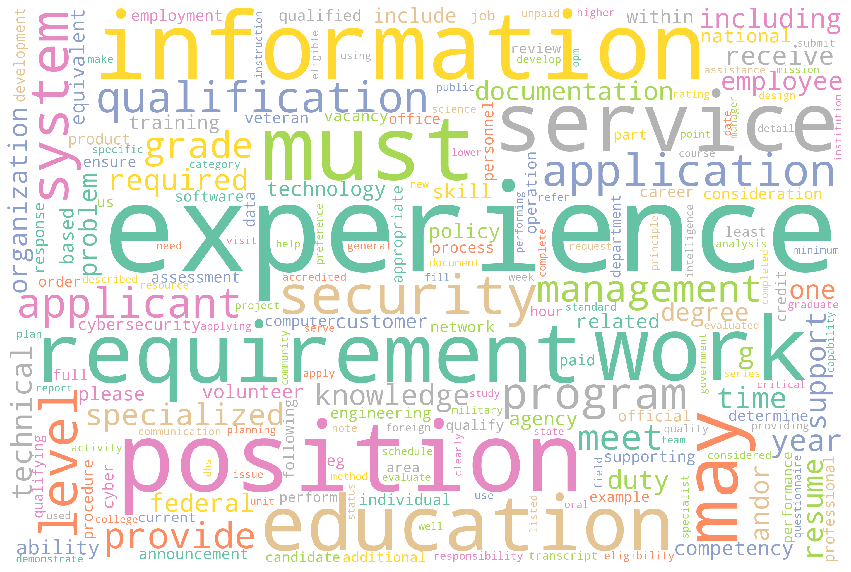

In [55]:
plot_wordcloud(df['job_desc'])

In [56]:
df

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade,job_desc
1,Department of Defense - Defense Information Sy...,CES-11659635-22VT,INTERDISCIPLINARY (CYBER),2022-09-21T16:34:31.0000,2022-09-28T23:59:59.9970,"['Fort Meade, Maryland']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Provides strategic direction to the team on ...,There is a positive education requirement for ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GG-15,This position is being recruited under 10 USC ...
2,Department of the Air Force - AFELEM US CYBER ...,9L-CYBER-11644600-725363-ML,OPERATIONS RESEARCH ANALYST,2022-09-09T12:20:54.3970,2022-09-22T23:59:59.9970,"['Fort Meade, Maryland']",The primary purpose of this position: To perfo...,"In order to qualify, you must meet the special...","[""Develops and applies ORA-based analytical pr...",IF USING EDUCATION TO QUALIFY: If position has...,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GG-13,The primary purpose of this position: To perfo...
3,Department of Homeland Security - U.S. Coast G...,22-2728-SE-CM-M,"Marine Transportation System Specialist, GS-03...",2022-09-13T11:47:07.9630,2022-09-23T23:59:59.9970,"['Norfolk, Virginia']",This position is located in Department of Home...,Applicants must possess one year of specialize...,['As a Marine Transportation System (MTS) Cybe...,This position does not have a positive educati...,We will review your r&eacute;sum&eacute; and s...,https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GS-12,This position is located in Department of Home...
5,Department of Homeland Security - U.S. Coast G...,22-2728-SE-CM-D,"Marine Transportation System Specialist, GS-03...",2022-09-13T11:52:26.8770,2022-09-23T23:59:59.9970,"['Norfolk, Virginia']",This position is located in Department of Home...,Applicants must possess one year of specialize...,['As a Marine Transportation System (MTS) Cybe...,This position does not have a positive educati...,We will review your r&eacute;sum&eacute; and s...,https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GS-12,This position is located in Department of Home...
6,Department of Defense - Defense Information Sy...,CES-11653731-22MJC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-09-21T00:00:00.0000,2022-09-30T23:59:59.9970,"['Scott AFB, Illinois', 'Hill AFB, Utah']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['In 24x7 construct, oversees and coordinates ...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GG-12,This position is being recruited under 10 USC ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,Department of Health And Human Services - Indi...,IHS-22-GP-11504917-DH,IT Specialist,2022-08-16T00:00:00.0000,2022-09-24T23:59:59.9970,"['Wagner, South Dakota']",This position will support the Federal Governm...,"To qualify for this position, your resume must...","[""Coordinates service unit and area computer s...",This position has an education requirement. Yo...,Additional selections may be made for similar ...,https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-09-22,GS-11,This position will support the Federal Governm...
2884,Department of Transportation - Federal Aviatio...,AWA-AXE-22-6122SC-80653,Supervisory Security Programs Specialist,2022-09-16T00:00:00.0000,2022-10-17T23:59:59.9970,"['Washington, District of Columbia']",The Office of National Security Programs and I...,Candidates must have one year (52 weeks) of SP...,"['Serves as the Deputy to the Director, Office...",Education cannot be substit

In [58]:
b = pd.DataFrame(df['Position Locations'].str.split("', '").tolist(), index=df['Position Title']).stack()
b = b.reset_index()[[0, 'Position Title']] 
b.columns = ['Position Locations', 'Position Title']
b['Position Locations']=b['Position Locations'].str.replace("\['","").str.replace("\']","")
b[['City','State']]=b['Position Locations'].str.rsplit(" ", n=1, expand=True)
b['City'] = b['City'].str.replace(",","")

In [59]:
b

,Position Locations,Position Title,City,State
0,"Fort Meade, Maryland",INTERDISCIPLINARY (CYBER),Fort Meade,Maryland
1,"Fort Meade, Maryland",OPERATIONS RESEARCH ANALYST,Fort Meade,Maryland
2,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia
3,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia
4,"Scott AFB, Illinois",IT CYBERSECURITY SPECIALIST (INFOSEC),Scott AFB,Illinois
...,...,...,...,...
33992,"Wagner, South Dakota",IT Specialist,Wagner South,Dakota
33993,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia
33994,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia
33995,"Clarksburg, West Virginia",Program Specialist,Clarksburg West,Virginia


In [60]:
state_2 ={'US STATE':'Abbr',
'Alabama':'AL',
'Alaska':'AK',
'Arizona':'AZ',
'Arkansas':'AR',
'California':'CA',
'Colorado':'CO',
'Connecticut':'CT',
'Delaware':'DE',
'Florida':'FL',
'Georgia':'GA',
'Hawaii':'HI',
'Idaho':'ID',
'Illinois':'IL',
'Indiana':'IN',
'Iowa':'IA',
'Kansas':'KS',
'Kentucky':'KY',
'Louisiana':'LA',
'Maine':'ME',
'Maryland':'MD',
'Massachusetts':'MA',
'Michigan':'MI',
'Minnesota':'MN',
'Mississippi':'MS',
'Missouri':'MO',
'Montana':'MT',
'Nebraska':'NE',
'Nevada':'NV',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New Mexico':'NM',
'New York':'NY',
'North Carolina':'NC',
'North Dakota':'ND',
'Ohio':'OH',
'Oklahoma':'OK',
'Oregon':'OR',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'South Carolina':'SC',
'South Dakota':'SD',
'Tennessee':'TN',
'Texas':'TX',
'Utah':'UT',
'Vermont':'VT',
'Virginia':'VA',
'Washington':'WA',
'West Virginia':'WV',
'Wisconsin':'WI',
'Wyoming':'WY',
'District of Columbia':'DC'}

In [61]:
b['state abbr'] = b['State'].map(state_2)

In [62]:
counties = pd.read_excel(r'us_cities_states_counties_mapping.xlsx')

In [63]:
counties

,primary_city,state,county
0,Holtsville,NY,Suffolk County
1,Adjuntas,PR,Adjuntas Municipio
2,Aguada,PR,Aguada Municipio
3,Aguadilla,PR,Aguadilla Municipio
4,Maricao,PR,Maricao Municipio
...,...,...,...
47150,S Naknek,AK,Bristol Bay Borough
47151,Bettles,AK,Yukon-Koyukuk Census Area
47152,Ft Yukon,AK,Yukon-Koyukuk Census Area
47153,Univ Of Ak,AK,Fairbanks North Star Borough


In [64]:
b = b.astype (str)
counties = counties.astype (str)

In [65]:
b['City'] = b['City'].str.strip()
b['state abbr'] = b['state abbr'].str.strip()
counties['primary_city'] = counties['primary_city'].str.strip()
counties['state'] = counties['state'].str.strip()

In [66]:
usajobs_county = pd.merge(b, counties, how='left', left_on=['state abbr','City'], right_on=['state','primary_city'])

In [67]:
usajobs_county

,Position Locations,Position Title,City,State,state abbr,primary_city,state,county
0,"Fort Meade, Maryland",INTERDISCIPLINARY (CYBER),Fort Meade,Maryland,MD,Fort Meade,MD,Anne Arundel County
1,"Fort Meade, Maryland",OPERATIONS RESEARCH ANALYST,Fort Meade,Maryland,MD,Fort Meade,MD,Anne Arundel County
2,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Norfolk,VA,Norfolk City
3,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Norfolk,VA,Virginia Beach City
4,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Norfolk,VA,Norfolk City
...,...,...,...,...,...,...,...,...
39873,"Wagner, South Dakota",IT Specialist,Wagner South,Dakota,nan,NaN,NaN,NaN
39874,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia,nan,NaN,NaN,NaN
39875,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia,nan,NaN,NaN,NaN
39876,"Clarksburg, West Virginia",Program Specialist,Clarksburg West,Virginia,VA,NaN,NaN,NaN


In [68]:
usajobs_county = usajobs_county[['Position Locations','Position Title','City','State','state abbr','county']]

In [69]:
usajobs_county

,Position Locations,Position Title,City,State,state abbr,county
0,"Fort Meade, Maryland",INTERDISCIPLINARY (CYBER),Fort Meade,Maryland,MD,Anne Arundel County
1,"Fort Meade, Maryland",OPERATIONS RESEARCH ANALYST,Fort Meade,Maryland,MD,Anne Arundel County
2,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Norfolk City
3,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Virginia Beach City
4,"Norfolk, Virginia","Marine Transportation System Specialist, GS-03...",Norfolk,Virginia,VA,Norfolk City
...,...,...,...,...,...,...
39873,"Wagner, South Dakota",IT Specialist,Wagner South,Dakota,nan,NaN
39874,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia,nan,NaN
39875,"Washington, District of Columbia",Supervisory Security Programs Specialist,Washington District of,Columbia,nan,NaN
39876,"Clarksburg, West Virginia",Program Specialist,Clarksburg West,Virginia,VA,NaN


In [71]:
msa = pd.read_csv(r'msa_county.csv')

In [72]:
msa_usajobs = pd.merge(msa, usajobs_county, how='left', left_on=['County name (or Township name for the New England states)', 'State abbreviation'], right_on=['county','state abbr'])

In [76]:
msa_usajobs = msa_usajobs[['AREA','AREA_TITLE','AREA_TYPE','PRIM_STATE','State_x','County name (or Township name for the New England states)']]